In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import tensorflow as tf
from tensorflow import keras
import random
from zipfile import ZipFile
import os
import time
from shutil import copyfile
import matplotlib.pyplot as mat
from matplotlib.image import imread

In [2]:
train_normal = 'xray/train/NORMAL'
train_pneumonia = 'xray/train/PNEUMONIA'
test_normal = 'xray/test/NORMAL'
test_pneumonia = 'xray/test/PNEUMONIA'

In [3]:
train_dir_normal = os.listdir(train_normal)
train_dir_pneumonia = os.listdir(train_pneumonia)
test_dir_normal = os.listdir(test_normal)
test_fir_pneumonia = os.listdir(test_pneumonia)

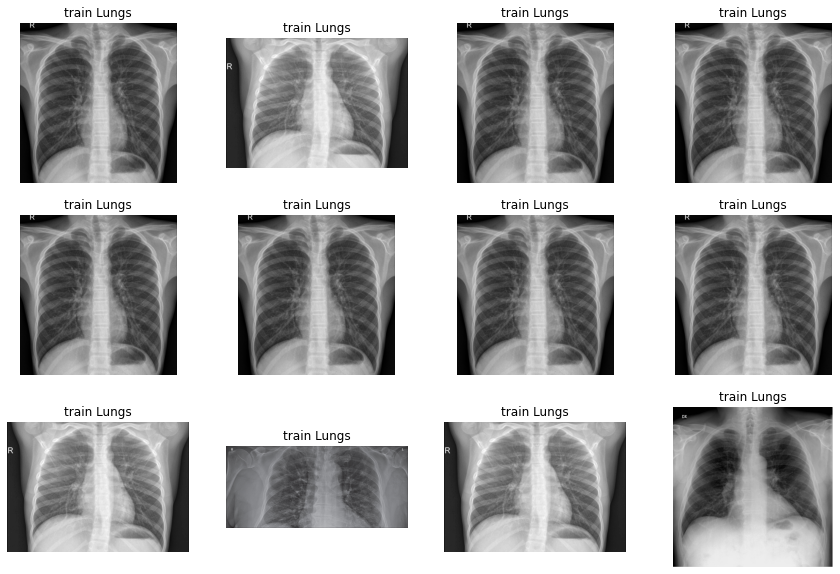

In [4]:
mat.figure(figsize=(15,10))
for i in range(12):
    ran = random.choice((1,30))
    rand_normal = [os.path.join(train_normal, f) for f in train_dir_normal[ran:ran+1]]
    rand_pneumonia = [os.path.join(train_pneumonia, f) for f in train_dir_pneumonia[ran:ran+1]]
    rand = random.choice(rand_pneumonia+rand_normal)
    name = rand.split('/')
    name = name[-2] + ' Lungs'
    mat.subplot(3, 4, i+1)
    img = mat.imread(rand)
    mat.imshow(img,cmap = 'gray')
    mat.axis(False)
    mat.title(name)
mat.show()

Sample_Image_size(H*W): (1357, 1890)


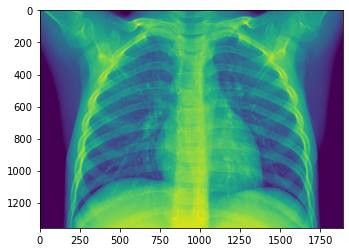

In [5]:
sample = random.choice(train_dir_normal)
sample = imread(train_normal+"/" + sample)
samp = sample.shape
mat.imshow(sample)
print('Sample_Image_size(H*W):', samp)

In [6]:
x, y = [], []
for i in train_dir_normal:
    img_array = imread(train_normal +"/"+ i)
    shape = img_array.shape
    x.append(shape[0])
    y.append(shape[1])
df_shape = pd.DataFrame({'height': x, 'width': y, 'index': range(0, len(train_dir_normal))})

In [7]:
df_shape.head()

,height,width,index
0,1317,1857,0
1,1509,2111,1
2,1837,2031,2
3,1326,1663,3
4,1818,2053,4


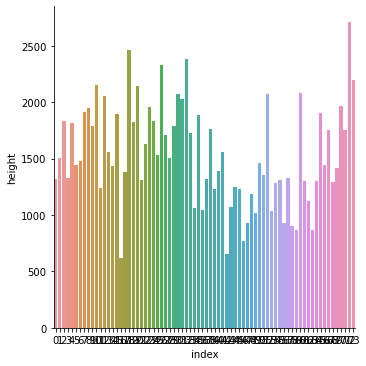

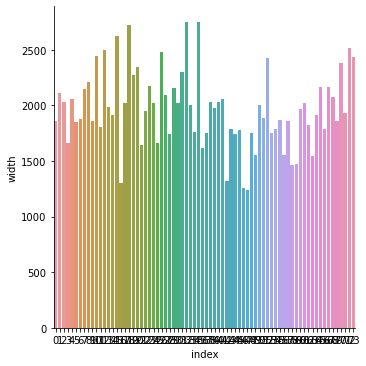

In [8]:
import seaborn as sns
def shape(x, y, df):
    sns.catplot(kind = 'bar', x = x, y = y, data = df)

shape('index', 'height', df_shape)
shape('index', 'width', df_shape)

In [10]:
df_shape.describe()

,height,width,index
count,74.000000,74.000000,74.000000
mean,1539.689189,1968.094595,36.500000
std,448.372030,340.261590,21.505813
min,617.000000,1240.000000,0.000000
25%,1255.000000,1765.000000,18.250000
50%,1469.500000,1959.500000,36.500000
75%,1870.750000,2150.750000,54.750000
max,2713.000000,2752.000000,73.000000


In [11]:
tr_dir = 'xray/train'
te_dir = 'xray/test'
datagen_train = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.)
train = datagen_train.flow_from_directory(tr_dir, target_size = (200,200), color_mode = 'grayscale', class_mode = 'binary', batch_size = 10)
datagen_test = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test = datagen_test.flow_from_directory(te_dir, target_size = (200,200), color_mode = 'grayscale', class_mode= 'binary', batch_size = 10)

Found 148 images belonging to 2 classes.
Found 43 images belonging to 2 classes.


In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (5,5), activation = 'relu', input_shape = (200,200, 1)),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Conv2D(256, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [13]:
opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'binary_crossentropy', optimizer=opt, metrics = ['accuracy'])

In [14]:
log_dir = os.path.join(os.curdir, 'logs')
def tensor_callback():
    file_name = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(log_dir, file_name)
file = tensor_callback()
tensor= keras.callbacks.TensorBoard(file)
early = keras.callbacks.EarlyStopping(patience=10)

check = keras.callbacks.ModelCheckpoint(os.curdir)
callbacks = [tensor, check, early]

In [15]:
history = model.fit(train, validation_data=test, epochs = 30, callbacks=callbacks)

Epoch 1/30
15/15 [==============================] - 17s 1s/step - loss: 0.5043 - accuracy: 0.7188 - val_loss: 0.6397 - val_accuracy: 0.5116
INFO:tensorflow:Assets written to: .\assets
Epoch 2/30
15/15 [==============================] - 12s 821ms/step - loss: 0.2377 - accuracy: 0.9109 - val_loss: 0.5764 - val_accuracy: 0.7907
INFO:tensorflow:Assets written to: .\assets
Epoch 3/30
15/15 [==============================] - 12s 805ms/step - loss: 0.2448 - accuracy: 0.9017 - val_loss: 0.5625 - val_accuracy: 0.6977
INFO:tensorflow:Assets written to: .\assets
Epoch 4/30
15/15 [==============================] - 12s 793ms/step - loss: 0.1382 - accuracy: 0.9527 - val_loss: 0.5617 - val_accuracy: 1.0000
INFO:tensorflow:Assets written to: .\assets
Epoch 5/30
15/15 [==============================] - 12s 785ms/step - loss: 0.1390 - accuracy: 0.9752 - val_loss: 0.5373 - val_accuracy: 0.9767
INFO:tensorflow:Assets written to: .\assets
Epoch 6/30
15/15 [==============================] - 12s 784ms/step -

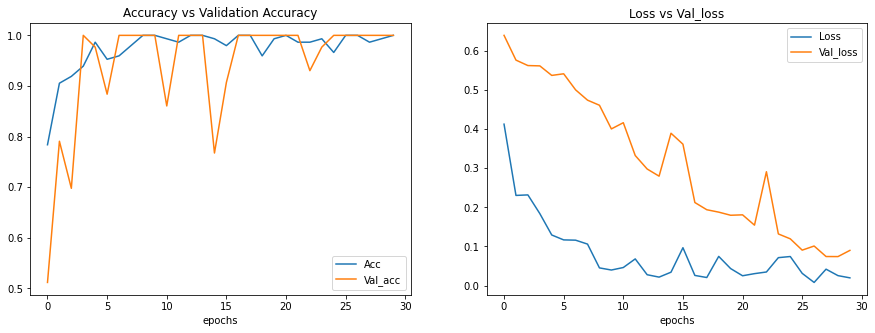

In [16]:
acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(len(history.epoch))

title1 = 'Accuracy vs Validation Accuracy'
leg1 = ['Acc', 'Val_acc']
title2 = 'Loss vs Val_loss'
leg2 = ['Loss', 'Val_loss']

def plot(epochs, acc, val_acc, leg, title):
    mat.plot(epochs, acc)
    mat.plot(epochs, val_acc)
    mat.title(title)
    mat.legend(leg)
    mat.xlabel('epochs')

mat.figure(figsize=(15,5))
mat.subplot(1,2,1)
plot(epochs, acc, val_acc, leg1, title1)
mat.subplot(1,2,2)
plot(epochs, loss, val_loss, leg2, title2)
mat.show()

In [17]:
import tensorflow.keras.preprocessing.image as im

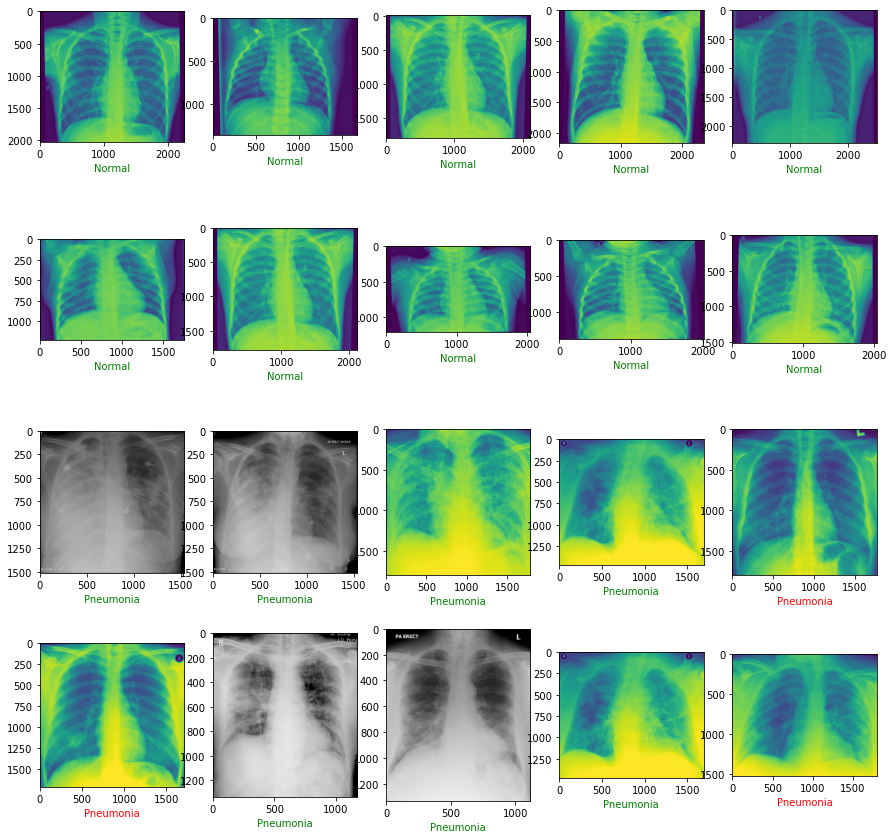

In [18]:
samp1, samp2 = [], []
for i in range(10):
    sample_img1 = test_normal+"/" +random.choice(test_dir_normal)
    samp1.append(sample_img1)
    sample_img = test_pneumonia+"/" +random.choice(test_fir_pneumonia)
    samp2.append(sample_img)

mat.figure(figsize = (15, 15))
list1 = [samp1 + samp2]
type1 = 'Normal'
m = 0
j = 1
for k in list1:
    for i in k:
        imagee = im.load_img(i, target_size = (200,200), color_mode = 'grayscale')
        imagee = im.img_to_array(imagee)
        imagee = tf.expand_dims(imagee, axis = 0)
        img = mat.imread(i)
        mat.subplot(4,5,j)
        mat.imshow(img)
        lab = mat.xlabel(type1)
        pred = model.predict(imagee)
        if pred == m:
            lab.set_color('green')
        else:
            lab.set_color('red')
        j+=1
        if j >10:
            type1 = 'Pneumonia'
            m = 1